# **Gemini API Simplified : For Babies in Python**

This beginner's guide will show you how to use the Gemini API in Python, which lets you tap into Google's Gemini large language models. In this tutorial, we'll cover:

1. Setting up your development environment and getting access to the Gemini API.
2. Generating text responses from text inputs.
3. Creating text responses from inputs that include both text and images.

The Gemini AI API, released on December 13, 2023, opens up exciting possibilities in the world of AI and machine learning. It can enhance user experiences, automate tasks, and solve complex problems. This guide will make it easy for beginners to start using the Gemini AI API with Python. We'll walk you through the basics, from setup to generating intelligent responses using text and images. Join us on this simplified journey into the world of the Gemini AI API!

# **Install the Python SDK & Import packages**

The Python SDK for the Gemini API, is contained in the [`google-generativeai`](https://pypi.org/project/google-generativeai/) package. Install the dependency using pip:


Import the necessary packages.

In [1]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.6/146.6 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.7/598.7 kB 6.8 MB/s eta 0:00:00


In [2]:
import pathlib
import textwrap

import google.generativeai as genai

# Used to securely store your API key
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

## **Setup your API key**

Before you can use the Gemini API, you must first obtain an API key. If you don't already have one, create a key with one click in Google AI Studio.

<a class="button button-primary" href="https://makersuite.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Get an API key</a>


In Colab, add the key to the secrets manager under the "🔑" in the left panel. Give it the name `GOOGLE_API_KEY`.

Once you have the API key, pass it to the SDK. You can do this in two ways:

* Put the key in the `GOOGLE_API_KEY` environment variable (the SDK will automatically pick it up from there).
* Pass the key to `genai.configure(api_key=...)`


In [3]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

## List models

Now you're ready to call the Gemini API. Use `list_models` to see the available Gemini models:

* `gemini-pro`: optimized for text-only prompts.
* `gemini-pro-vision`: optimized for text-and-images prompts.

## Generate text from text inputs

For text-only prompts, use the `gemini-pro` model:

In [4]:
model = genai.GenerativeModel('gemini-pro')

The `generate_content` method can handle a wide variety of use cases, including multi-turn chat and multimodal input, depending on what the underlying model supports. The available models only support text and images as input, and text as output.

In the simplest case, you can pass a prompt string to the `GenerativeModel.generate_content` method:

In [5]:
response = model.generate_content("What is the Gemini.AI?")

In simple cases, the `response.text` accessor is all you need. To display formatted Markdown text, use the `to_markdown` function:

In [6]:
to_markdown(response.text)

> Gemini.AI is a conversational AI assistant that is designed to help people with a variety of tasks, from answering questions to generating creative content. It is powered by the latest in natural language processing and machine learning technology, and is able to understand and respond to a wide range of conversational topics.
> 
> Gemini.AI is able to understand and respond to a wide range of conversational topics. It can also learn from its interactions with users, and improve its ability to help them over time.
> 
> Some of the things that Gemini.AI can do for you include:
> 
> * Answer your questions on a wide range of topics
> * Generate creative content, such as stories, poems, and songs
> * Translate text from one language to another
> * Summarize long articles or documents
> * Help you with your schoolwork or job
> * Plan your day or week
> * Keep track of your finances
> * Shop for products and services
> * And much more!
> 
> Gemini.AI is still under development, but it has the potential to become a powerful tool for people of all ages and backgrounds. It is a reminder of the rapid progress that is being made in the field of artificial intelligence, and the potential that it has to change the world.

Gemini can generate multiple possible responses for a single prompt. These possible responses are called `candidates`, and you can review them to select the most suitable one as the response.

View the response candidates with `GenerateContentResponse.candidates`:

In [7]:
response.candidates

[content {
  parts {
    text: "Gemini.AI is a conversational AI assistant that is designed to help people with a variety of tasks, from answering questions to generating creative content. It is powered by the latest in natural language processing and machine learning technology, and is able to understand and respond to a wide range of conversational topics.\n\nGemini.AI is able to understand and respond to a wide range of conversational topics. It can also learn from its interactions with users, and improve its ability to help them over time.\n\nSome of the things that Gemini.AI can do for you include:\n\n* Answer your questions on a wide range of topics\n* Generate creative content, such as stories, poems, and songs\n* Translate text from one language to another\n* Summarize long articles or documents\n* Help you with your schoolwork or job\n* Plan your day or week\n* Keep track of your finances\n* Shop for products and services\n* And much more!\n\nGemini.AI is still under developme

By default, the model returns a response after completing the entire generation process. You can also stream the response as it is being generated, and the model will return chunks of the response as soon as they are generated.

To stream responses, use `GenerativeModel.generate_content(..., stream=True)`.

## Generate text from image and text inputs

Gemini provides a multimodal model (`gemini-pro-vision`) that accepts both text and images and inputs. The `GenerativeModel.generate_content` API is designed to handle multimodal prompts and returns a text output.

Let's include an image:

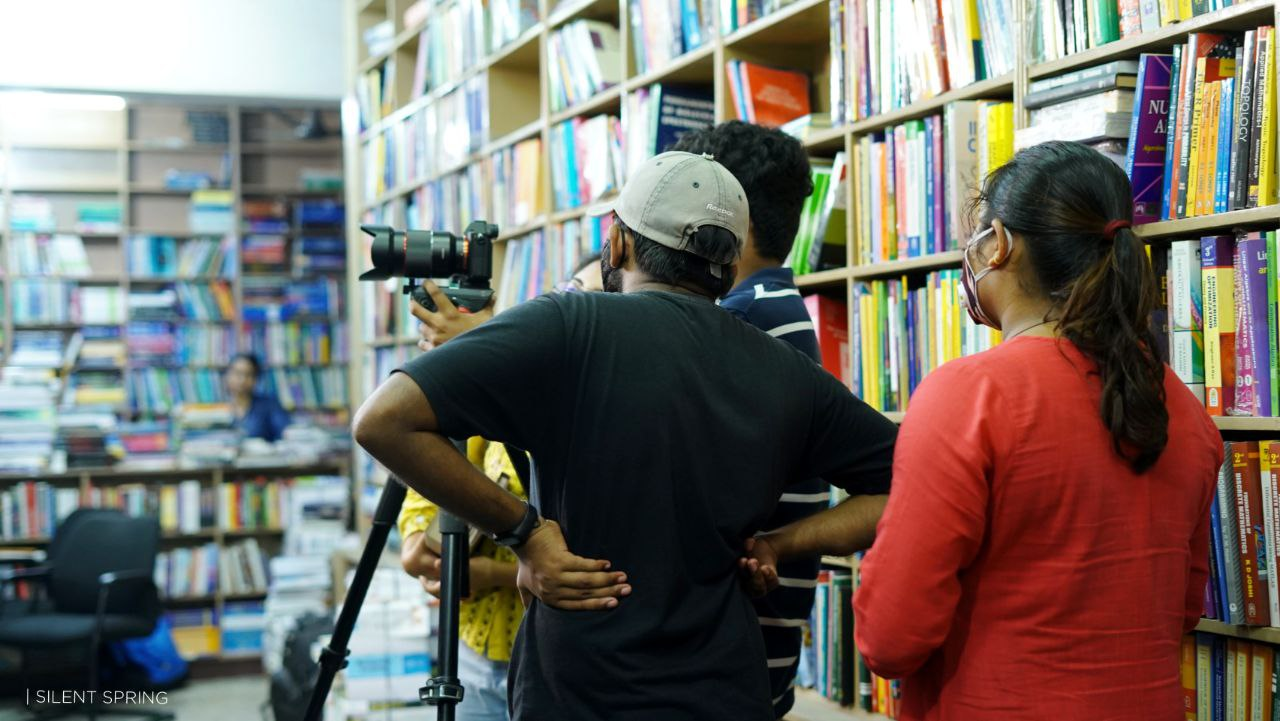

In [9]:
import PIL.Image

image = PIL.Image.open('/content/image.jpg')
image

Use the `gemini-pro-vision` model and pass the image to the model with `generate_content`.

In [10]:
model = genai.GenerativeModel('gemini-pro-vision')

In [11]:
response = model.generate_content(image)

to_markdown(response.text)

>  A group of people are filming in a library.

To provide both text and images in a prompt, pass a list containing the strings and images:

In [12]:
response = model.generate_content(["Write a short, description on what you see in the  the image ", image], stream=True)
response.resolve()

In [13]:
to_markdown(response.text)

>  In the image you see a small crew filming in a library. A man is holding a camera on a tripod, and another man and woman are standing next to him. The man with the camera is wearing a black shirt and a baseball cap, and the other man is wearing a blue shirt and the woman is wearing a red shirt. The woman is wearing a mask. There are bookshelves all around them.



> I hope this guide has helped you grasp the basics of using the Gemini AI API. In our next article, we will dive deeper into advanced use cases and explore its wide-ranging applications in detail. Stay tuned for more exciting insights into the world of Gemini AI API!

